In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import pickle
with open('dados/depresso.pkl', 'rb') as f:
  X_prev, X_test, y_classe, y_test = pickle.load(f)

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

In [4]:
param_distrib = {
    'max_depth': [3, 4],
    'max_features': [None, 'sqrt'], # Intervalo para o número máximo de features
    'min_samples_split': [8, 9, 10, 12, 15],  # Número mínimo de amostras necessárias para dividir um nó
    'min_samples_leaf': [14, 15, 17, 20],  # Número mínimo de amostras em cada folha
    'criterion': ['entropy', 'gini']   # Critérios de divisão
}

In [5]:
modelo_arvore = DecisionTreeClassifier(random_state=42)

In [6]:
modelo = RandomizedSearchCV(
    modelo_arvore, param_distributions=param_distrib,
    n_iter=300, cv=5, scoring='accuracy', random_state=42
)

In [7]:
modelo.fit(X_prev, y_classe)

/home/eduardoavs/PUC/S4/IA/TP/ambiente/lib/python3.12/site-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 160 is smaller than n_iter=300. Running 160 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
                   n_iter=300,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [3, 4],
                                        'max_features': [None, 'sqrt'],
                                        'min_samples_leaf': [14, 15, 17, 20],
                                        'min_samples_split': [8, 9, 10, 12,
                                                              15]},
                   random_state=42, scoring='accuracy')

In [8]:
melhor_modelo = modelo.best_estimator_

In [9]:
previsoes = melhor_modelo.predict(X_test)

In [10]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy_score(y_test,previsoes)

0.7039687345186327

In [11]:
from yellowbrick.classifier import ConfusionMatrix
confusion_matrix(y_test, previsoes)

array([[ 1439,   220],
       [ 5158, 11350]])

0.7039687345186327

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

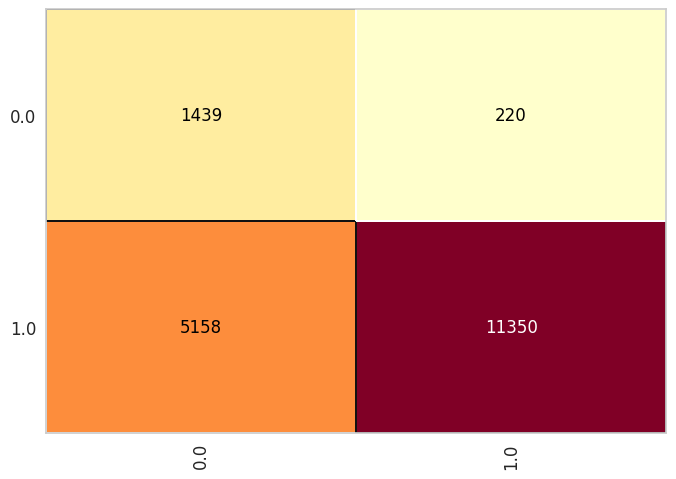

In [12]:
cm = ConfusionMatrix(modelo)
cm.fit(X_prev, y_classe)
cm.score(X_test, y_test)

In [13]:
print(classification_report(y_test, previsoes))

              precision    recall  f1-score   support

         0.0       0.22      0.87      0.35      1659
         1.0       0.98      0.69      0.81     16508

    accuracy                           0.70     18167
   macro avg       0.60      0.78      0.58     18167
weighted avg       0.91      0.70      0.77     18167



findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

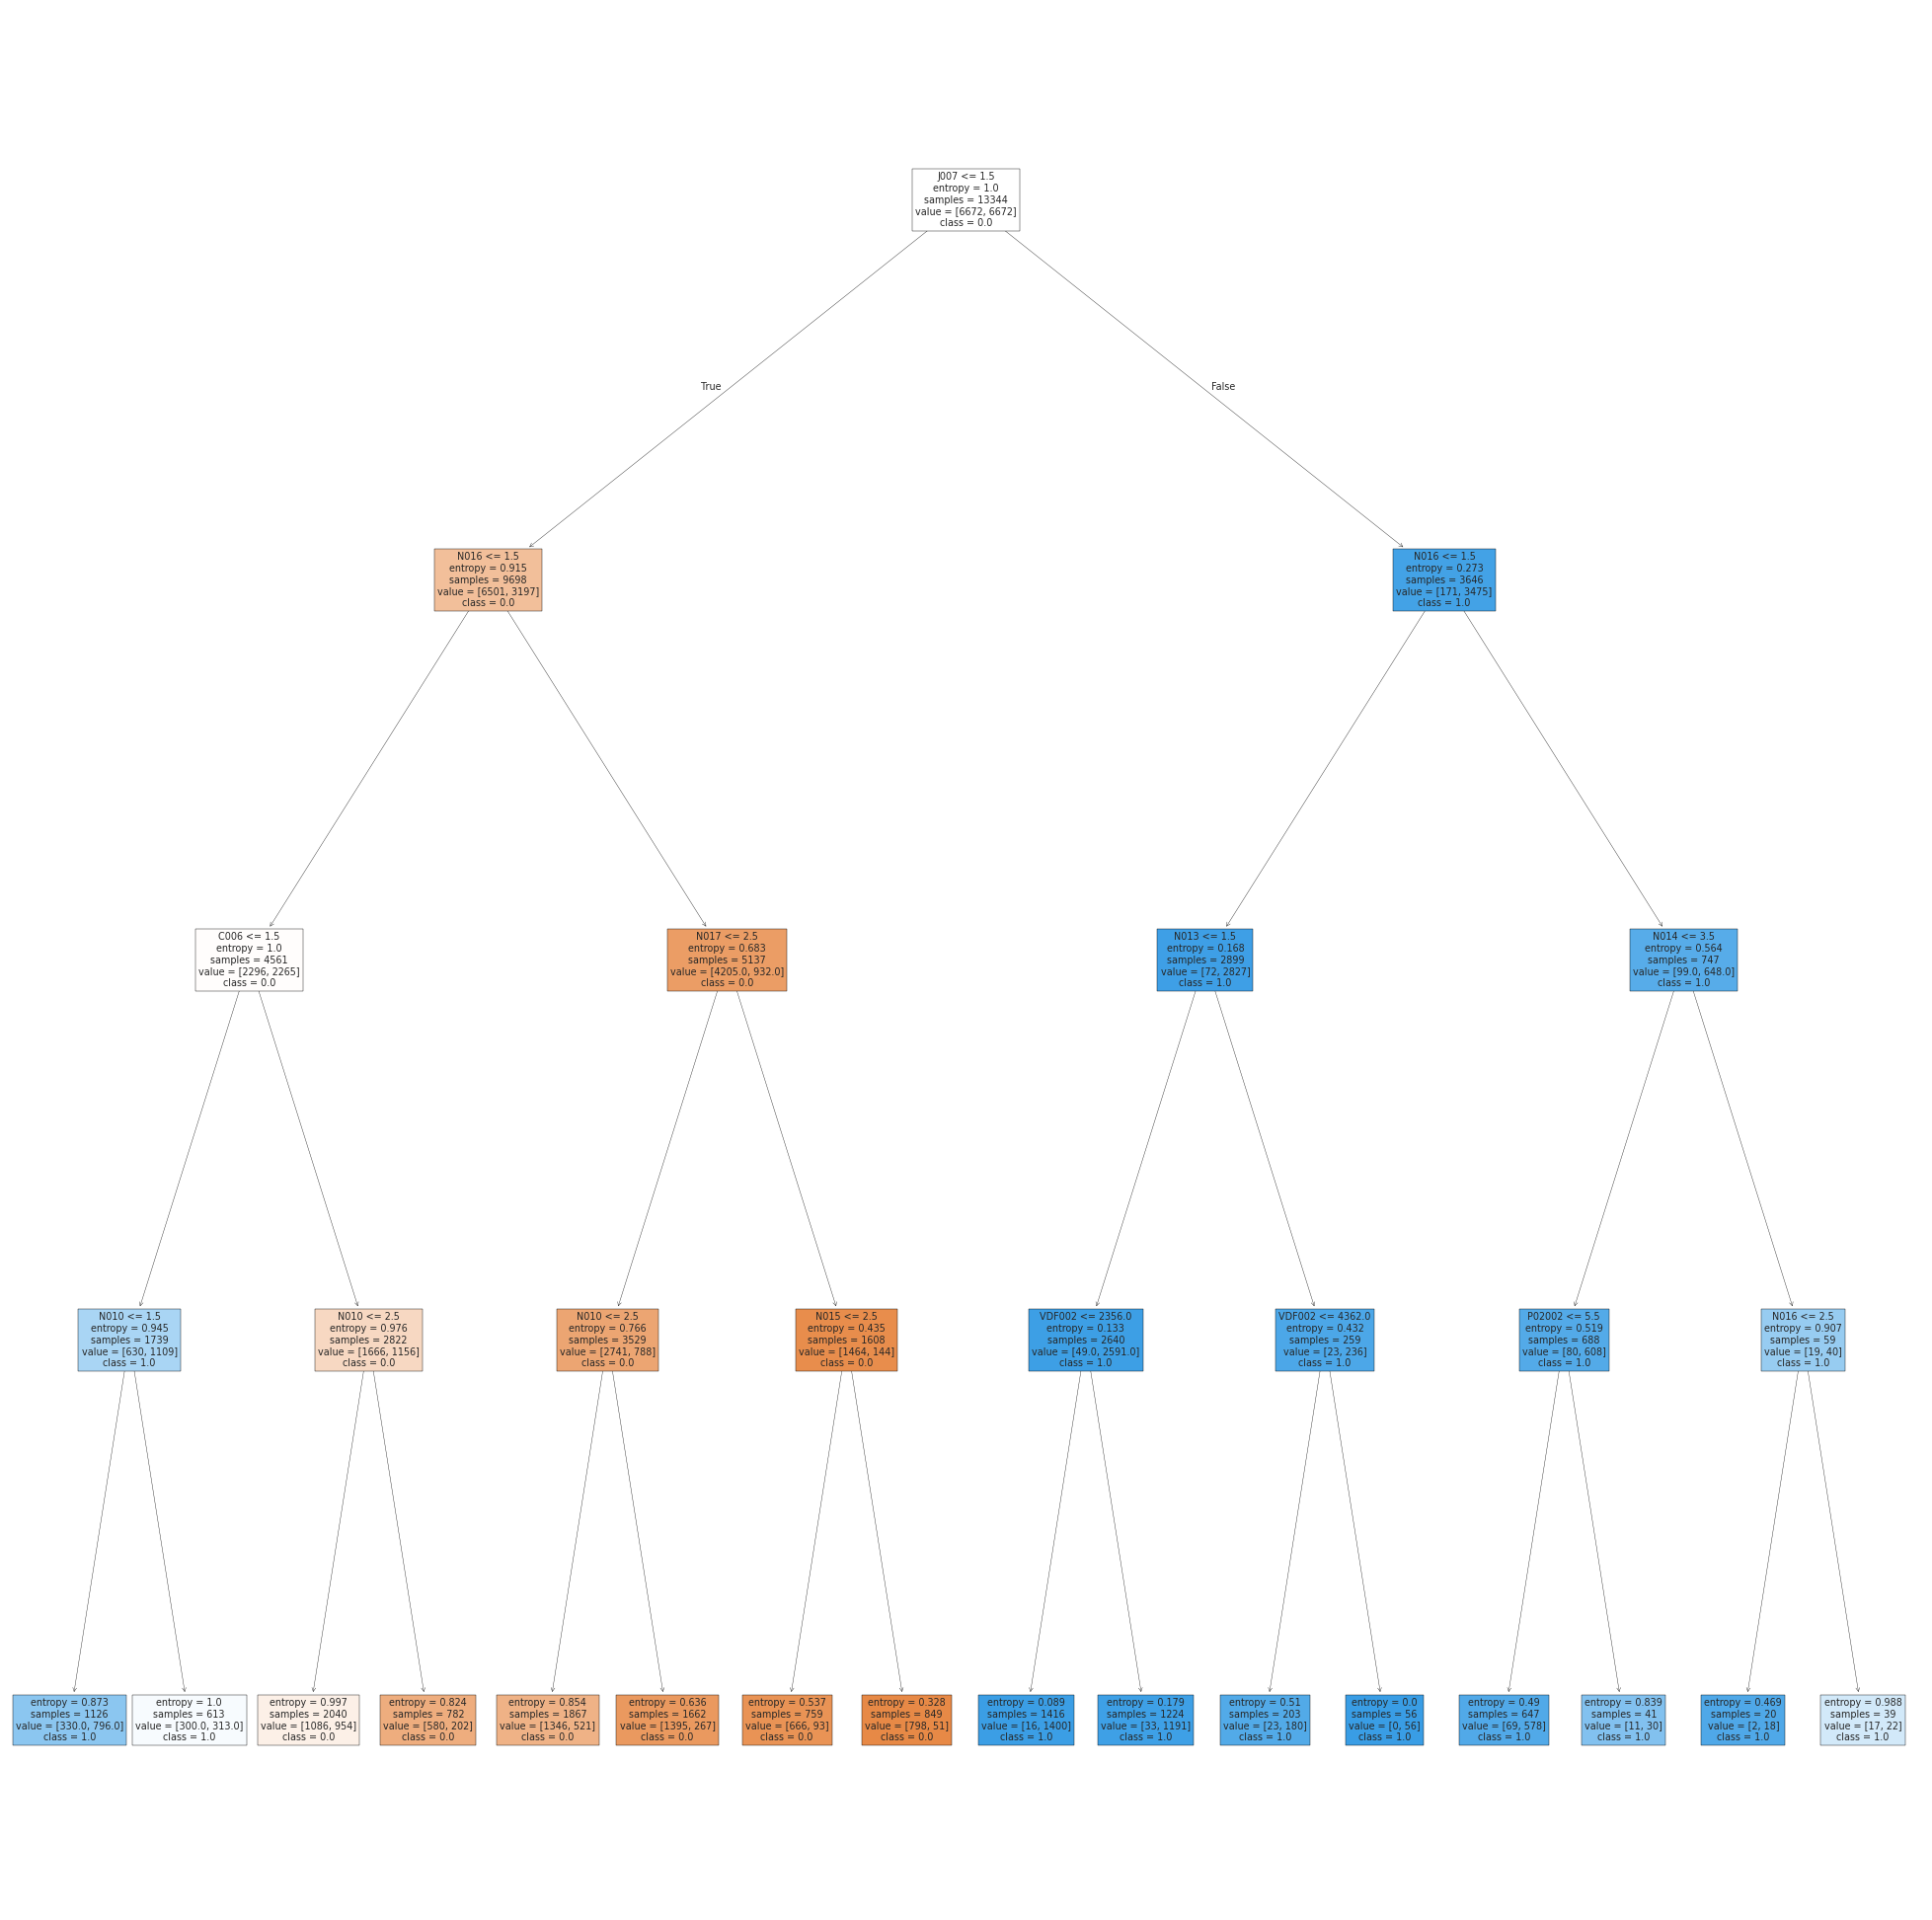

In [14]:
from sklearn import tree


# Supondo que previsores e melhor_modelo estão definidos corretamente
previsores = ['C009_1',
 'C009_2',
 'C009_3',
 'C011_1.0',
 'C011_2.0',
 'C011_3.0',
 'C011_4.0',
 'C006',
 'C00703',
 'D00901',
 'J007',
 'M01401',
 'M01501',
 'M01601',
 'M01901',
 'N001',
 'N00101',
 'N010',
 'N011',
 'N012',
 'N013',
 'N014',
 'N015',
 'N016',
 'N017',
 'N018',
 'P018',
 'P02002',
 'P02602',
 'P027',
 'P034',
 'P04502',
 'P050',
 'Q120',
 'V00201',
 'V00203',
 'V02802',
 'H001',
 'VDF002',]

# Converte as classes para strings, caso sejam do tipo numérico
class_names = [str(c) for c in melhor_modelo.classes_]

# Cria uma figura e eixos para o gráfico da árvore de decisão
figura, eixos = plt.subplots(nrows=1, ncols=1, figsize=(25, 25))

# Plota a árvore de decisão usando o modelo treinado
tree.plot_tree(melhor_modelo, feature_names=previsores, class_names=class_names, filled=True)

# Exibe o gráfico
plt.show()
